## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  38.613577   682.679890  0.373690  9.221171  1.483468
1  40.015797   639.969878  0.240996  3.685624  1.390542
2  37.937120  1684.580723  0.521658  3.906102  1.532416
3   7.568065   883.397825  0.640148  7.523236  1.519794
4  59.203050   296.748033  0.833344  3.529030  1.167717


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.8985036	total: 61.8ms	remaining: 1m 1s
1:	learn: 0.8877186	total: 62.8ms	remaining: 31.3s
2:	learn: 0.8768750	total: 63.8ms	remaining: 21.2s
3:	learn: 0.8661323	total: 64.8ms	remaining: 16.1s
4:	learn: 0.8571605	total: 65.3ms	remaining: 13s
5:	learn: 0.8487476	total: 66ms	remaining: 10.9s
6:	learn: 0.8394597	total: 66.4ms	remaining: 9.42s
7:	learn: 0.8297527	total: 67.1ms	remaining: 8.31s
8:	learn: 0.8200846	total: 67.9ms	remaining: 7.48s
9:	learn: 0.8105475	total: 69.1ms	remaining: 6.84s
10:	learn: 0.8015470	total: 69.6ms	remaining: 6.26s
11:	learn: 0.7927959	total: 70.6ms	remaining: 5.82s
12:	learn: 0.7847256	total: 71.2ms	remaining: 5.41s
13:	learn: 0.7745067	total: 72ms	remaining: 5.07s
14:	learn: 0.7658853	total: 72.6ms	remaining: 4.77s
15:	learn: 0.7575286	total: 73.3ms	remaining: 4.51s
16:	learn: 0.7482053	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7395672	total: 74.3ms	remaining: 4.05s
18:	learn: 0.7308851	total: 74.8ms	remaining: 3.86

41:	learn: 0.5761056	total: 86.5ms	remaining: 1.97s
42:	learn: 0.5702880	total: 87.5ms	remaining: 1.95s
43:	learn: 0.5659584	total: 88ms	remaining: 1.91s
44:	learn: 0.5609114	total: 89.1ms	remaining: 1.89s
45:	learn: 0.5547362	total: 89.5ms	remaining: 1.86s
46:	learn: 0.5490115	total: 90ms	remaining: 1.82s
47:	learn: 0.5443654	total: 90.5ms	remaining: 1.79s
48:	learn: 0.5385769	total: 91ms	remaining: 1.77s
49:	learn: 0.5339274	total: 91.7ms	remaining: 1.74s
50:	learn: 0.5295291	total: 92.1ms	remaining: 1.71s
51:	learn: 0.5245523	total: 92.6ms	remaining: 1.69s
52:	learn: 0.5197260	total: 93.1ms	remaining: 1.66s
53:	learn: 0.5154618	total: 93.4ms	remaining: 1.64s
54:	learn: 0.5109534	total: 93.9ms	remaining: 1.61s
55:	learn: 0.5068144	total: 94.4ms	remaining: 1.59s
56:	learn: 0.5026345	total: 94.9ms	remaining: 1.57s
57:	learn: 0.4977185	total: 95.2ms	remaining: 1.55s
58:	learn: 0.4932157	total: 95.7ms	remaining: 1.53s
59:	learn: 0.4889908	total: 96.2ms	remaining: 1.51s
60:	learn: 0.48510

225:	learn: 0.1952742	total: 167ms	remaining: 571ms
226:	learn: 0.1943073	total: 168ms	remaining: 572ms
227:	learn: 0.1939162	total: 168ms	remaining: 570ms
228:	learn: 0.1937252	total: 169ms	remaining: 569ms
229:	learn: 0.1931644	total: 169ms	remaining: 567ms
230:	learn: 0.1924675	total: 170ms	remaining: 565ms
231:	learn: 0.1918355	total: 170ms	remaining: 563ms
232:	learn: 0.1910915	total: 170ms	remaining: 561ms
233:	learn: 0.1905891	total: 171ms	remaining: 560ms
234:	learn: 0.1900726	total: 171ms	remaining: 558ms
235:	learn: 0.1894006	total: 172ms	remaining: 557ms
236:	learn: 0.1891206	total: 172ms	remaining: 555ms
237:	learn: 0.1881999	total: 173ms	remaining: 553ms
238:	learn: 0.1878871	total: 173ms	remaining: 552ms
239:	learn: 0.1874091	total: 174ms	remaining: 550ms
240:	learn: 0.1866173	total: 174ms	remaining: 548ms
241:	learn: 0.1864038	total: 175ms	remaining: 547ms
242:	learn: 0.1860905	total: 175ms	remaining: 545ms
243:	learn: 0.1855331	total: 175ms	remaining: 543ms
244:	learn: 

417:	learn: 0.1222678	total: 247ms	remaining: 344ms
418:	learn: 0.1217732	total: 248ms	remaining: 344ms
419:	learn: 0.1214343	total: 248ms	remaining: 343ms
420:	learn: 0.1211020	total: 249ms	remaining: 342ms
421:	learn: 0.1206716	total: 249ms	remaining: 341ms
422:	learn: 0.1202289	total: 250ms	remaining: 340ms
423:	learn: 0.1191847	total: 250ms	remaining: 340ms
424:	learn: 0.1187737	total: 250ms	remaining: 339ms
425:	learn: 0.1184618	total: 251ms	remaining: 338ms
426:	learn: 0.1180435	total: 251ms	remaining: 337ms
427:	learn: 0.1178137	total: 251ms	remaining: 336ms
428:	learn: 0.1175123	total: 252ms	remaining: 335ms
429:	learn: 0.1172169	total: 252ms	remaining: 334ms
430:	learn: 0.1169272	total: 253ms	remaining: 333ms
431:	learn: 0.1165314	total: 253ms	remaining: 333ms
432:	learn: 0.1163081	total: 253ms	remaining: 332ms
433:	learn: 0.1160281	total: 254ms	remaining: 331ms
434:	learn: 0.1157535	total: 254ms	remaining: 330ms
435:	learn: 0.1155371	total: 254ms	remaining: 329ms
436:	learn: 

612:	learn: 0.0686301	total: 327ms	remaining: 206ms
613:	learn: 0.0682498	total: 327ms	remaining: 206ms
614:	learn: 0.0680631	total: 327ms	remaining: 205ms
615:	learn: 0.0676913	total: 328ms	remaining: 204ms
616:	learn: 0.0675877	total: 328ms	remaining: 204ms
617:	learn: 0.0674058	total: 329ms	remaining: 203ms
618:	learn: 0.0670425	total: 329ms	remaining: 203ms
619:	learn: 0.0668648	total: 329ms	remaining: 202ms
620:	learn: 0.0665096	total: 330ms	remaining: 201ms
621:	learn: 0.0663409	total: 330ms	remaining: 201ms
622:	learn: 0.0662586	total: 331ms	remaining: 200ms
623:	learn: 0.0661778	total: 331ms	remaining: 199ms
624:	learn: 0.0658311	total: 331ms	remaining: 199ms
625:	learn: 0.0656607	total: 332ms	remaining: 198ms
626:	learn: 0.0655820	total: 332ms	remaining: 198ms
627:	learn: 0.0652435	total: 332ms	remaining: 197ms
628:	learn: 0.0650771	total: 333ms	remaining: 196ms
629:	learn: 0.0647463	total: 333ms	remaining: 196ms
630:	learn: 0.0645836	total: 334ms	remaining: 195ms
631:	learn: 

810:	learn: 0.0355038	total: 406ms	remaining: 94.7ms
811:	learn: 0.0353484	total: 407ms	remaining: 94.2ms
812:	learn: 0.0352611	total: 408ms	remaining: 93.7ms
813:	learn: 0.0351212	total: 408ms	remaining: 93.2ms
814:	learn: 0.0349698	total: 408ms	remaining: 92.7ms
815:	learn: 0.0348853	total: 409ms	remaining: 92.2ms
816:	learn: 0.0346886	total: 409ms	remaining: 91.7ms
817:	learn: 0.0345295	total: 410ms	remaining: 91.2ms
818:	learn: 0.0343958	total: 410ms	remaining: 90.6ms
819:	learn: 0.0342356	total: 410ms	remaining: 90.1ms
820:	learn: 0.0341109	total: 411ms	remaining: 89.6ms
821:	learn: 0.0339812	total: 411ms	remaining: 89ms
822:	learn: 0.0338562	total: 411ms	remaining: 88.5ms
823:	learn: 0.0337015	total: 412ms	remaining: 88ms
824:	learn: 0.0336365	total: 412ms	remaining: 87.5ms
825:	learn: 0.0335146	total: 413ms	remaining: 86.9ms
826:	learn: 0.0334254	total: 413ms	remaining: 86.4ms
827:	learn: 0.0333054	total: 414ms	remaining: 85.9ms
828:	learn: 0.0332429	total: 414ms	remaining: 85.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.47448760785139055


ABC Pre-generator MAE 1.2129594536390764


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

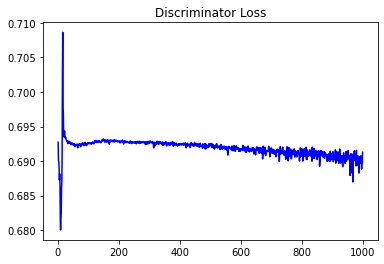

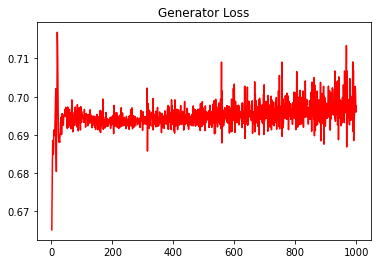

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.4979749399386346


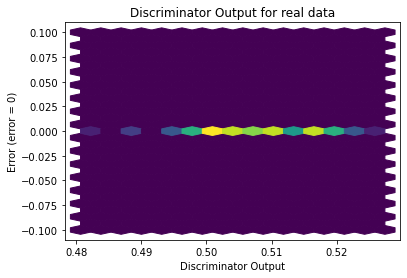

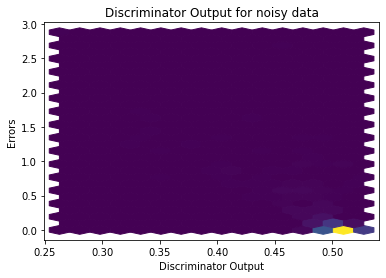

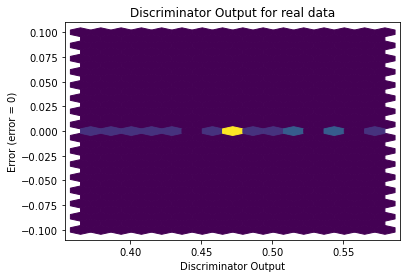

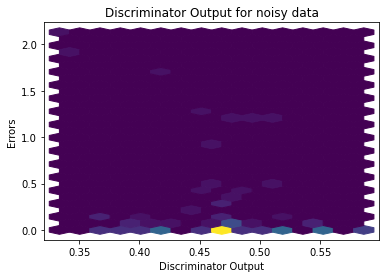

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

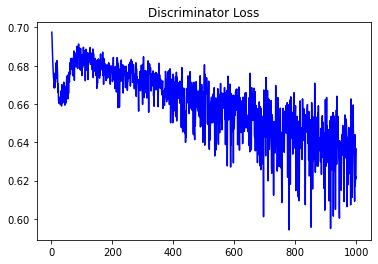

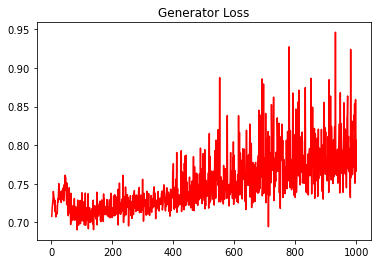

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.48032940870989116


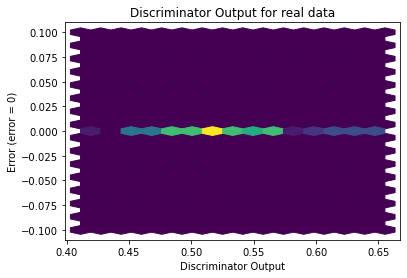

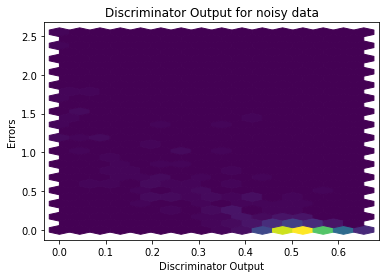

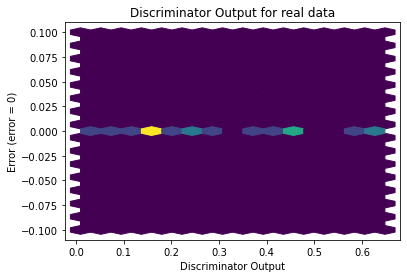

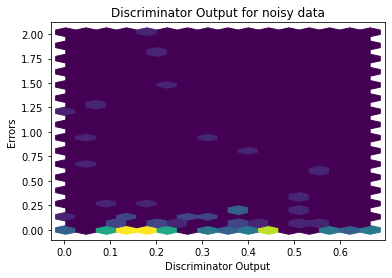

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


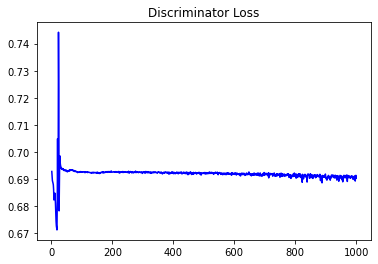

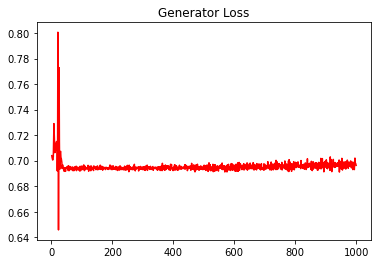

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4976746448725462


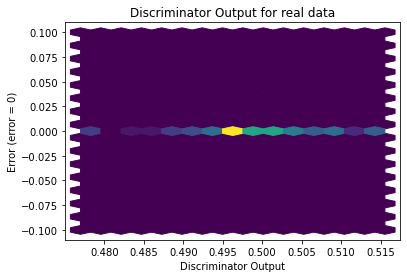

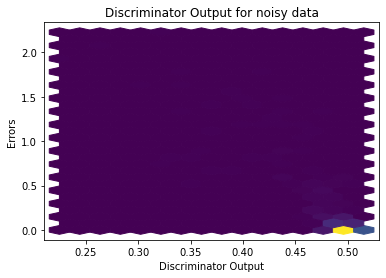

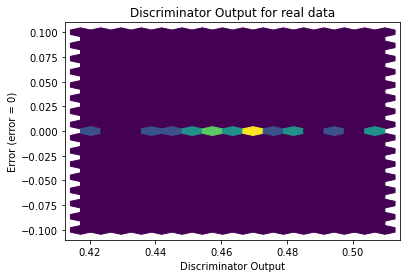

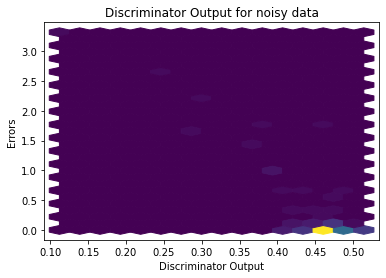

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


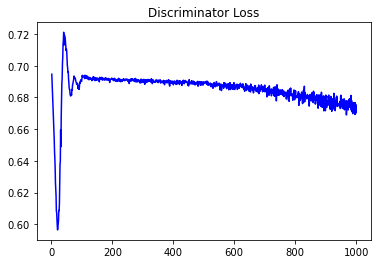

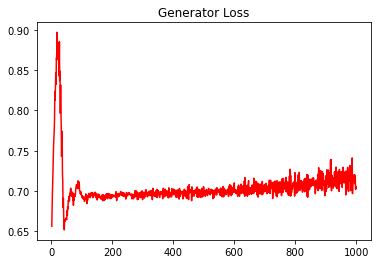

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.45742690394818786


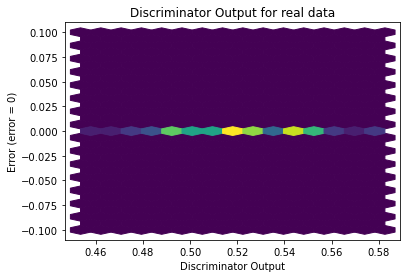

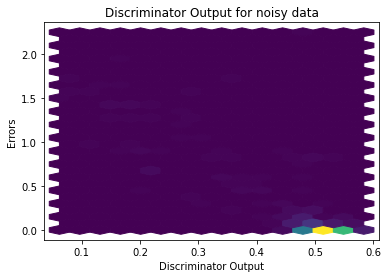

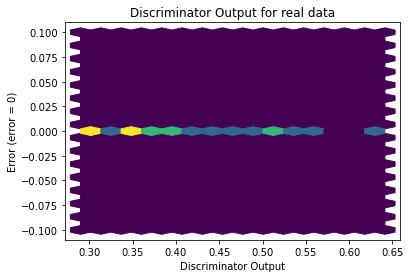

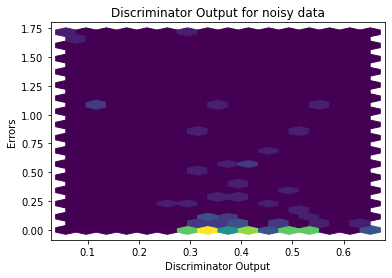

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8448]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1905]], requires_grad=True)
